In [3]:
import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib
from itertools import compress
#from ipynb.fs.full.Hide import hide_toggle # this function has to be in the same directory!
# pip install finta!!! the only site that has inverse fisher transform!

In [26]:
symbol ="GC=F"
num_name= symbol.split(' ') 
df = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        data=ticker.history(interval='1d',start="2020-05-01",end="2021-02-09")
        data['Date'] = pd.to_datetime(data.index) # just to crate another column for date!!!
        data['Date'] = data['Date'].apply(mpl_dates.date2num)
        data = data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc_data= data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']].values
        df.append(data)

df[0]

,Date,Open,High,Low,Close
Date,,,,,
2020-04-30,18382.0,1719.300049,1719.300049,1680.800049,1684.199951
2020-05-01,18383.0,1686.599976,1701.500000,1670.500000,1694.500000
2020-05-04,18386.0,1702.599976,1709.000000,1699.599976,1706.900024
2020-05-05,18387.0,1701.500000,1704.400024,1697.199951,1704.400024
2020-05-06,18388.0,1704.000000,1704.000000,1684.199951,1684.199951
...,...,...,...,...,...
2021-02-02,18660.0,1859.599976,1861.300049,1827.599976,1830.500000
2021-02-03,18661.0,1834.800049,1842.400024,1829.800049,1832.199951
2021-02-04,18662.0,1832.199951,1832.199951,1782.800049,1788.900024


In [27]:
df[0]['12EMA'] = talib.EMA(df[0]['Close'], timeperiod = 12)
df[0]['26EMA'] = talib.EMA(df[0]['Close'], timeperiod = 26)
#data_frames_separate[0][['Close','12EMA','26EMA']].plot(figsize=(12,10))
df[0]

,Date,Open,High,Low,Close,12EMA,26EMA
Date,,,,,,,
2020-04-30,18382.0,1719.300049,1719.300049,1680.800049,1684.199951,NaN,NaN
2020-05-01,18383.0,1686.599976,1701.500000,1670.500000,1694.500000,NaN,NaN
2020-05-04,18386.0,1702.599976,1709.000000,1699.599976,1706.900024,NaN,NaN
2020-05-05,18387.0,1701.500000,1704.400024,1697.199951,1704.400024,NaN,NaN
2020-05-06,18388.0,1704.000000,1704.000000,1684.199951,1684.199951,NaN,NaN
...,...,...,...,...,...,...,...
2021-02-02,18660.0,1859.599976,1861.300049,1827.599976,1830.500000,1850.212934,1857.355023
2021-02-03,18661.0,1834.800049,1842.400024,1829.800049,1832.199951,1847.441705,1855.491684
2021-02-04,18662.0,1832.199951,1832.199951,1782.800049,1788.900024,1838.435293,1850.558969


In [28]:
df[0]["MACDLine"]= df[0]['12EMA']-df[0]['26EMA']
df[0]['SignalLine'] = talib.EMA(df[0]["MACDLine"], timeperiod = 9)
df[0]['Histogram'] = df[0]["MACDLine"]- df[0]['SignalLine']
df[0]['Histogram']

Date
2020-04-30         NaN
2020-05-01         NaN
2020-05-04         NaN
2020-05-05         NaN
2020-05-06         NaN
                ...   
2021-02-02   -1.769519
2021-02-03   -2.141927
2021-02-04   -4.972499
2021-02-05   -5.016796
2021-02-08   -3.364770
Name: Histogram, Length: 194, dtype: float64

In [29]:
df[0]

,Date,Open,High,Low,Close,12EMA,26EMA,MACDLine,SignalLine,Histogram
Date,,,,,,,,,,
2020-04-30,18382.0,1719.300049,1719.300049,1680.800049,1684.199951,NaN,NaN,NaN,NaN,NaN
2020-05-01,18383.0,1686.599976,1701.500000,1670.500000,1694.500000,NaN,NaN,NaN,NaN,NaN
2020-05-04,18386.0,1702.599976,1709.000000,1699.599976,1706.900024,NaN,NaN,NaN,NaN,NaN
2020-05-05,18387.0,1701.500000,1704.400024,1697.199951,1704.400024,NaN,NaN,NaN,NaN,NaN
2020-05-06,18388.0,1704.000000,1704.000000,1684.199951,1684.199951,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-02-02,18660.0,1859.599976,1861.300049,1827.599976,1830.500000,1850.212934,1857.355023,-7.142090,-5.372570,-1.769519
2021-02-03,18661.0,1834.800049,1842.400024,1829.800049,1832.199951,1847.441705,1855.491684,-8.049979,-5.908052,-2.141927
2021-02-04,18662.0,1832.199951,1832.199951,1782.800049,1788.900024,1838.435293,1850.558969,-12.123676,-7.151177,-4.972499


In [30]:
df[0]['Signal'] = 0.0
df[0]['Signal'] = np.where(df[0]['MACDLine'] > df[0]['SignalLine'], 1.0, 0.0)
df[0]['Position'] = df[0]['Signal'].diff()
df[0]

,Date,Open,High,Low,Close,12EMA,26EMA,MACDLine,SignalLine,Histogram,Signal,Position
Date,,,,,,,,,,,,
2020-04-30,18382.0,1719.300049,1719.300049,1680.800049,1684.199951,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-05-01,18383.0,1686.599976,1701.500000,1670.500000,1694.500000,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2020-05-04,18386.0,1702.599976,1709.000000,1699.599976,1706.900024,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2020-05-05,18387.0,1701.500000,1704.400024,1697.199951,1704.400024,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2020-05-06,18388.0,1704.000000,1704.000000,1684.199951,1684.199951,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-02,18660.0,1859.599976,1861.300049,1827.599976,1830.500000,1850.212934,1857.355023,-7.142090,-5.372570,-1.769519,0.0,0.0
2021-02-03,18661.0,1834.800049,1842.400024,1829.800049,1832.199951,1847.441705,1855.491684,-8.049979,-5.908052,-2.141927,0.0,0.0
2021-02-04,18662.0,1832.199951,1832.199951,1782.800049,1788.900024,1838.435293,1850.558969,-12.123676,-7.151177,-4.972499,0.0,0.0


In [31]:
# df[0][['MACDLine','SignalLine']].plot(figsize=(12,10))
# plt.show()


In [32]:
def plotMACD(num):
    
  fig = plt.figure(figsize=(12,8))
  gs = gridspec.GridSpec(2, 1, height_ratios = [2,1]) 
  ax_stock= plt.subplot(gs[0])    
  plt.title(num_name[num])

  candlestick_ohlc(ax_stock,df[num].values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

 # plot ‘buy’ signals
  plt.plot(data[data['Position'] == 1].index, 
         data['Close'][data['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
  plt.plot(data[data['Position'] == -1].index, 
         data['Close'][data['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
    
    
  ax_MACD= plt.subplot(gs[1],sharex=ax_stock)
 
  ax_MACD.plot(data.index,df[0]["MACDLine"] )
  ax_MACD.plot(data.index,df[0]["SignalLine"] )
  ax_MACD.plot(data.index,df[0]['Histogram'])

  plt.fill_between(data.index,df[0]['Histogram'])

  

  legend_labels= ["MACDLine", "SignalLine"]
    # plot ‘buy’ signals
  plt.plot(data[data['Position'] == 1].index, 
         data['MACDLine'][data['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
  plt.plot(data[data['Position'] == -1].index, 
         data['MACDLine'][data['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
  ax_MACD.legend(legend_labels,loc = 2)
    

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax_MACD.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  fig.tight_layout()
  ax_stock.grid()
  #ax_rsi.grid()
# Removing the date labels and ticks from the price subplot:
  ax_stock.get_xaxis().set_visible(False)
# Removing the gap between the plots:
  fig.subplots_adjust(hspace=0)
# Adding a horizontal line at the zero level in the ROC subplot:
  ax_MACD.axhline(0, color = (.5, .5, .5), linestyle = '--', alpha = 0.5)
# We can add labels to both vertical axis:
  ax_stock.set_ylabel("Price ($)")
  ax_MACD.set_ylabel("MACD")


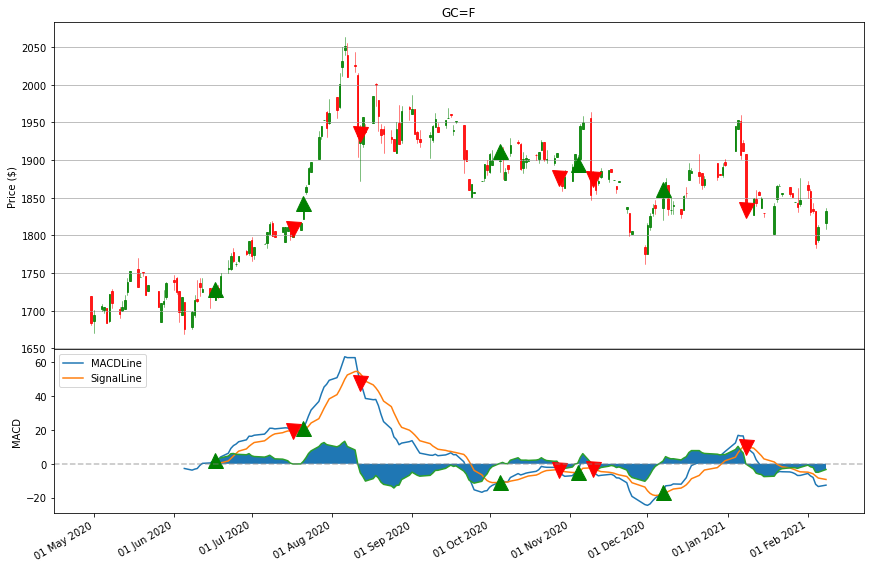

In [33]:
plotMACD(0)